<a href="https://colab.research.google.com/github/betoval/learning-tensorflow/blob/master/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**Supervised Machine Learning**

Supervised learning occurs when you use an algorithm to learn from example data and associated labels, in order to later predict the correct response when posed with other examples.

In math language this means that the algorithm can be written as

$Y=f(X)$

where

$Y$ = predicted output

$f$ = function

$X$ = input data

The model eventually learns to predict the labels for unseen (new) data points.

**Linear Regression Model**

In [0]:
n_examples = 1000 #training examples
training_steps = 1000 #number of steps we are going to train for
display_step = 100
learning_rate = 0.01 #multiplying factor on gradients
m, c = 6, -5 #gradient (slope) and y-intercept of our line

A function to calculate the predicted $y$, given

weight = m

bias = c

In [0]:
def train_data(n,m,c):
  x = tf.random.normal([n]) # n values taken from normal distribution
  noise = tf.random.normal([n])
  y = m*x + c + noise #scatter plot
  return x, y
def prediction(x, weight, bias):
  return weight*x + bias #our predicted (learned) m and c expression is linear (y=mx+c)

A function to take predicted weights and biases and calculate the mean square loss from y (original)

In [0]:
def loss(x, y, weights, bias):
  error = prediction(x, weights, bias) - y #how wrong our predicted y is
  squared_error = tf.square(error)
  return tf.reduce_mean(input_tensor=squared_error)

In [0]:
def grad(x, y, weights, bias):
  with tf.GradientTape() as tape:
    loss1 = loss(x, y, weights, bias)
    return tape.gradient(loss1,[weights,bias])#direction and value of the gradient of our weights and biases


Initial loss: 51.637


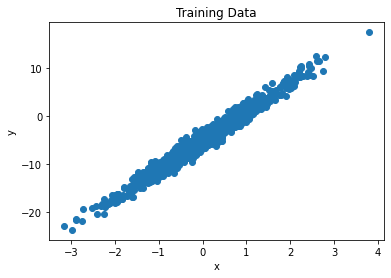

In [51]:
x,y = train_data(n_examples,m,c) #training values x,y
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
W = tf.Variable(np.random.randn()) #value for predicted weight (m)
B = tf.Variable(np.random.randn()) #value for predicted bias (c)
print("Initial loss: {:.3f}".format(loss(x,y,W,B)))

In [52]:
#Adjust weights and bias to successively lower the loss
for step in range(training_steps):
  deltaW, deltaB = grad(x,y,W,B)
  change_W = deltaW*learning_rate
  change_B = deltaB*learning_rate
  W.assign_sub(change_W)
  B.assign_sub(change_B)
  if step==0 or step % display_step == 0:
    print(deltaW.numpy(), deltaB.numpy())
    print("Loss at step {:02d}: {:.6f}".format(step,loss(x,y,W,B)))

-10.621782 9.796004
Loss at step 00: 49.570507
-1.2916719 1.2463684
Loss at step 100: 1.816240
-0.15679482 0.15888116
Loss at step 200: 1.078959
-0.018993855 0.020293526
Loss at step 300: 1.067551
-0.0022959672 0.0025963802
Loss at step 400: 1.067374
-0.00027796254 0.00033351593
Loss at step 500: 1.067371
-3.4112483e-05 4.5865774e-05
Loss at step 600: 1.067371
-2.2968277e-05 2.3759902e-05
Loss at step 700: 1.067371
-2.2968277e-05 2.3759902e-05
Loss at step 800: 1.067371
-2.2968277e-05 2.3759902e-05
Loss at step 900: 1.067371


Final loss: 1.067
W=5.9924702644348145, B=-4.950345516204834
Compared with m=6.000, c=-5.000 of the original line


Text(0.5, 1.0, 'Line of best fit')

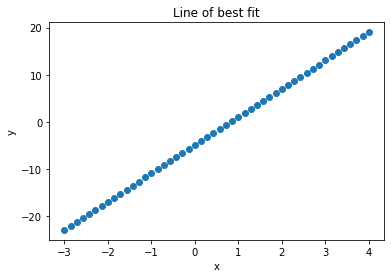

In [54]:
print("Final loss: {:.3f}".format(loss(x,y,W,B)))
print("W={}, B={}".format(W.numpy(),B.numpy()))
print("Compared with m={:.3f}, c={:.3f}".format(m,c), "of the original line")
xs = np.linspace(-3,4,50)
ys = W.numpy()*xs + B.numpy()
plt.scatter(xs,ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Line of best fit")